<a href="https://colab.research.google.com/github/priyanka12177/data_projects-ADVDS/blob/Project7/Project7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# unziping facedb data from mount drive
!unzip /content/facesDB.zip

Archive:  /content/facesDB.zip
   creating: facesDB/S1/
  inflating: facesDB/S1/1.BMP        
  inflating: facesDB/S1/10.BMP       
  inflating: facesDB/S1/2.BMP        
  inflating: facesDB/S1/3.BMP        
  inflating: facesDB/S1/4.BMP        
  inflating: facesDB/S1/5.BMP        
  inflating: facesDB/S1/6.BMP        
  inflating: facesDB/S1/7.BMP        
  inflating: facesDB/S1/8.BMP        
  inflating: facesDB/S1/9.BMP        
  inflating: facesDB/S1/Thumbs.db    
   creating: facesDB/S10/
  inflating: facesDB/S10/1.BMP       
  inflating: facesDB/S10/10.BMP      
  inflating: facesDB/S10/2.BMP       
  inflating: facesDB/S10/3.BMP       
  inflating: facesDB/S10/4.BMP       
  inflating: facesDB/S10/5.BMP       
  inflating: facesDB/S10/6.BMP       
  inflating: facesDB/S10/7.BMP       
  inflating: facesDB/S10/8.BMP       
  inflating: facesDB/S10/9.BMP       
  inflating: facesDB/S10/Thumbs.db   
   creating: facesDB/S11/
  inflating: facesDB/S11/1.BMP       
  inflating: faces

In [3]:
# Definfing the directory path that has images
data_dir = '/content/facesDB'

In [4]:
# defining the batch size, height and width of the images
batch_size = 32
img_height = 48
img_width = 48

In [5]:
#prepossing the data by picking from the directory to train and test data using
# image_dataset_from_directory function, validation of 20% data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 400 files belonging to 40 classes.
Using 320 files for training.


In [6]:
#prepossing the data by picking from the directory to train and test data using
# image_dataset_from_directory function, validation of 20% data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 400 files belonging to 40 classes.
Using 80 files for validation.


In [7]:
# Checking the class names for training data
class_names = train_ds.class_names
print(class_names)
# printing the length of the training data
print (len(class_names))

['S1', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S2', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S3', 'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39', 'S4', 'S40', 'S5', 'S6', 'S7', 'S8', 'S9']
40


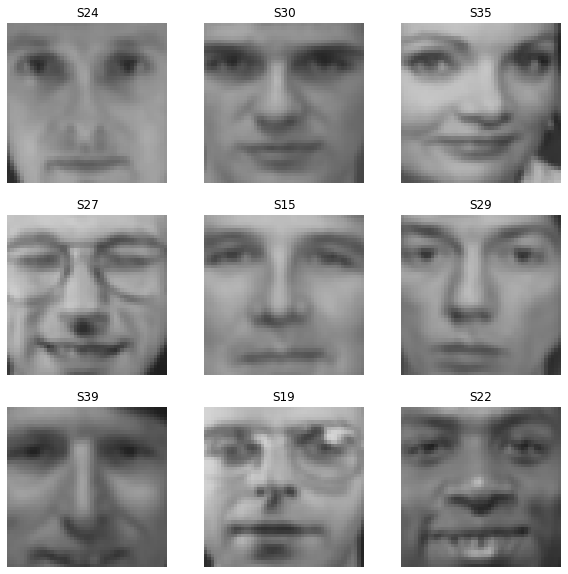

In [8]:
# using plot function to display few images from the training data
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
#Cacheing tht immages as this will make the training fast and each epoch need not load the data
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
# defining the number of target classes
num_classes = 40
model1 = Sequential([
   # stadardizing by Rescaling the rgb scale data                   
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  #starting with a convultion layer with 16 filters and filter size 3 , followed by a max pooling layer. 
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #convultion layer with 32 filters and filter size 3 , followed by a max pooling layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #convultion layer with 64 filters and filter size 3 , followed by a max pooling layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # The filter maps are flattened to provide features to the classifier.
  layers.Flatten(),
   # Between the feature extractor and the output layer, we can add a dense layer to interpret 
  # the features, in this case with 128 nodes. 
  # all layers will use the ReLU activation function and the He weight initialization scheme, 
  # which are best practices.
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [11]:
#compiling model with adam optimizer
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# printing the model structure
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 48, 48, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        1

In [13]:
# fitting the model with 50 epocs
epochs=50
history1 = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs, verbose = 1
)

Epoch 1/50
10/10 [==============================] - 2s 110ms/step - loss: 3.7157 - accuracy: 0.0250 - val_loss: 3.6912 - val_accuracy: 0.0125
Epoch 2/50
10/10 [==============================] - 1s 86ms/step - loss: 3.6832 - accuracy: 0.0312 - val_loss: 3.6872 - val_accuracy: 0.0125
Epoch 3/50
10/10 [==============================] - 1s 85ms/step - loss: 3.6762 - accuracy: 0.0531 - val_loss: 3.6820 - val_accuracy: 0.0250
Epoch 4/50
10/10 [==============================] - 1s 87ms/step - loss: 3.6593 - accuracy: 0.0594 - val_loss: 3.6717 - val_accuracy: 0.0125
Epoch 5/50
10/10 [==============================] - 1s 85ms/step - loss: 3.6123 - accuracy: 0.0688 - val_loss: 3.6020 - val_accuracy: 0.0125
Epoch 6/50
10/10 [==============================] - 1s 91ms/step - loss: 3.4825 - accuracy: 0.1781 - val_loss: 3.4023 - val_accuracy: 0.2250
Epoch 7/50
10/10 [==============================] - 1s 89ms/step - loss: 3.2177 - accuracy: 0.2344 - val_loss: 3.0331 - val_accuracy: 0.2250
Epoch 8/50
1

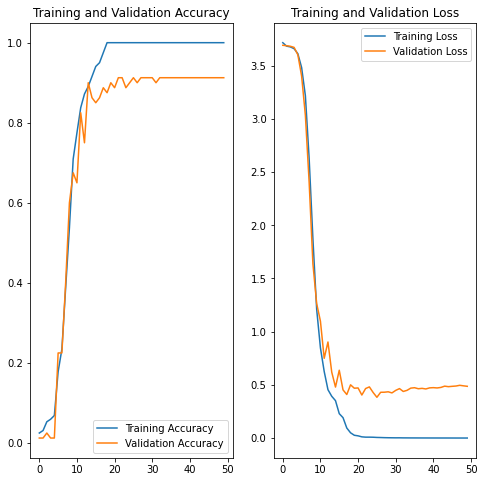

In [14]:
# printing the training accuracy, test accuracy graphs , training lossand testing loss
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

# getting the testing loss and accuracy
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs)

# plotting the accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting the loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
# Evaluating the model
mod1 = model1.evaluate(val_ds)
mod1[1]

3/3 [==============================] - 0s 19ms/step - loss: 0.4871 - accuracy: 0.9125


0.9125000238418579

In [16]:
# As we saw overfitting in the model 1 , adding more convolution layers
#Adding convolution/ max pooling layer
num_classes = 40
model2 = Sequential([
  # stadardizing by Rescaling the rgb scale data 
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  # convlution layer with 16 filters followed by max pooling
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # convlution layer with 32 filters followed by max pooling
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # convlution layer with 64 filters followed by max pooling
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # convlution layer with 128 filters followed by max pooling
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # flattenning
  layers.Flatten(),
  #hidden layer with 128 neurons
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=50
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs, verbose = 1
)
mod2 = model2.evaluate(val_ds)
mod2[1]


Epoch 1/50
10/10 [==============================] - 2s 113ms/step - loss: 3.6994 - accuracy: 0.0031 - val_loss: 3.6881 - val_accuracy: 0.0250
Epoch 2/50
10/10 [==============================] - 1s 98ms/step - loss: 3.6893 - accuracy: 0.0188 - val_loss: 3.6899 - val_accuracy: 0.0000e+00
Epoch 3/50
10/10 [==============================] - 1s 99ms/step - loss: 3.6876 - accuracy: 0.0406 - val_loss: 3.6902 - val_accuracy: 0.0125
Epoch 4/50
10/10 [==============================] - 1s 98ms/step - loss: 3.6850 - accuracy: 0.0406 - val_loss: 3.6900 - val_accuracy: 0.0125
Epoch 5/50
10/10 [==============================] - 1s 97ms/step - loss: 3.6813 - accuracy: 0.0281 - val_loss: 3.6885 - val_accuracy: 0.0125
Epoch 6/50
10/10 [==============================] - 1s 100ms/step - loss: 3.6698 - accuracy: 0.0281 - val_loss: 3.6780 - val_accuracy: 0.0375
Epoch 7/50
10/10 [==============================] - 1s 99ms/step - loss: 3.6453 - accuracy: 0.0594 - val_loss: 3.6307 - val_accuracy: 0.0625
Epoch 8

0.925000011920929

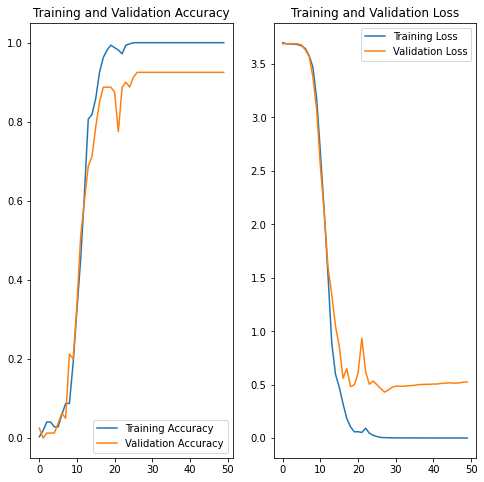

In [17]:
# printing the training accuracy, test accuracy graphs , training lossand testing loss
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

# getting the testing loss and accuracy
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

# plotting the accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting the loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
#model 2 didn't improve the results
#Adding droupout layer
num_classes = 40
model3 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  # convlution layer with 16 filters followed by max pooling
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # convlution layer with 32 filters followed by max pooling
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # convlution layer with 64 filters followed by max pooling
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # convlution layer with 128 filters followed by max pooling
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #dropout with 20%
  layers.Dropout(0.2),
  layers.Flatten(),
  #hidden layer with 128 neurons
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=50
history3 = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs, verbose = 1
)
mod3 = model3.evaluate(val_ds)
mod3[1]


Epoch 1/50
10/10 [==============================] - 2s 115ms/step - loss: 3.7121 - accuracy: 0.0312 - val_loss: 3.6885 - val_accuracy: 0.0000e+00
Epoch 2/50
10/10 [==============================] - 1s 99ms/step - loss: 3.6890 - accuracy: 0.0219 - val_loss: 3.6912 - val_accuracy: 0.0125
Epoch 3/50
10/10 [==============================] - 1s 101ms/step - loss: 3.6873 - accuracy: 0.0344 - val_loss: 3.6928 - val_accuracy: 0.0125
Epoch 4/50
10/10 [==============================] - 1s 100ms/step - loss: 3.6848 - accuracy: 0.0312 - val_loss: 3.6945 - val_accuracy: 0.0125
Epoch 5/50
10/10 [==============================] - 1s 99ms/step - loss: 3.6843 - accuracy: 0.0375 - val_loss: 3.6993 - val_accuracy: 0.0125
Epoch 6/50
10/10 [==============================] - 1s 101ms/step - loss: 3.6820 - accuracy: 0.0375 - val_loss: 3.6945 - val_accuracy: 0.0125
Epoch 7/50
10/10 [==============================] - 1s 100ms/step - loss: 3.6758 - accuracy: 0.0375 - val_loss: 3.6959 - val_accuracy: 0.0125
Epoc

0.8999999761581421

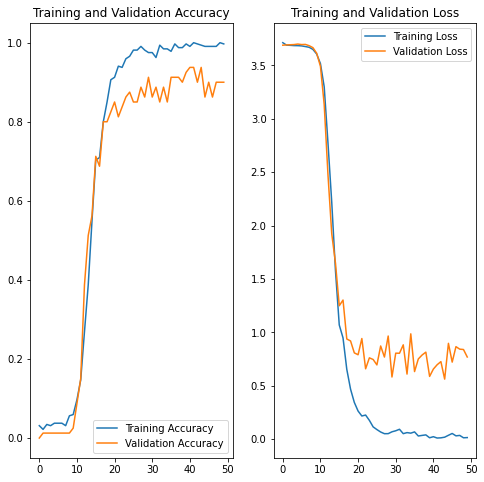

In [19]:
# printing the training accuracy, test accuracy graphs , training lossand testing loss
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
# model3 has reduced the overfit but it can be further reduced
# increased the filters in all the convultion layers 
num_classes = 40
model4 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=50
history4 = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs, verbose = 1
)
mod4 = model4.evaluate(val_ds)
mod4[1]


Epoch 1/50
10/10 [==============================] - 3s 255ms/step - loss: 3.7150 - accuracy: 0.0156 - val_loss: 3.6902 - val_accuracy: 0.0000e+00
Epoch 2/50
10/10 [==============================] - 2s 240ms/step - loss: 3.6884 - accuracy: 0.0156 - val_loss: 3.6927 - val_accuracy: 0.0125
Epoch 3/50
10/10 [==============================] - 2s 238ms/step - loss: 3.6897 - accuracy: 0.0281 - val_loss: 3.7011 - val_accuracy: 0.0125
Epoch 4/50
10/10 [==============================] - 2s 239ms/step - loss: 3.6868 - accuracy: 0.0344 - val_loss: 3.7000 - val_accuracy: 0.0125
Epoch 5/50
10/10 [==============================] - 2s 238ms/step - loss: 3.6862 - accuracy: 0.0344 - val_loss: 3.7078 - val_accuracy: 0.0000e+00
Epoch 6/50
10/10 [==============================] - 2s 241ms/step - loss: 3.6821 - accuracy: 0.0406 - val_loss: 3.7057 - val_accuracy: 0.0000e+00
Epoch 7/50
10/10 [==============================] - 2s 240ms/step - loss: 3.6720 - accuracy: 0.0312 - val_loss: 3.7013 - val_accuracy: 0

0.9375

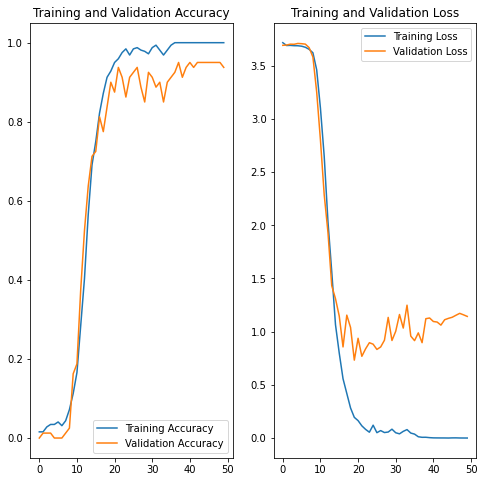

In [21]:
# printing the training accuracy, test accuracy graphs , training lossand testing loss
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

# getting the testing loss and accuracy
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs_range = range(epochs)

# plotting the accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting the loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
#Model4 didn't improve the results 
# Adding droupout layer and a hidden layer
num_classes = 40
model5 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=50
history5 = model5.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs, verbose = 1
)
mod5 = model5.evaluate(val_ds)
mod5[1]


Epoch 1/50
10/10 [==============================] - 2s 117ms/step - loss: 3.7129 - accuracy: 0.0156 - val_loss: 3.6905 - val_accuracy: 0.0375
Epoch 2/50
10/10 [==============================] - 1s 104ms/step - loss: 3.6900 - accuracy: 0.0281 - val_loss: 3.6925 - val_accuracy: 0.0375
Epoch 3/50
10/10 [==============================] - 1s 103ms/step - loss: 3.6886 - accuracy: 0.0375 - val_loss: 3.6951 - val_accuracy: 0.0000e+00
Epoch 4/50
10/10 [==============================] - 1s 103ms/step - loss: 3.6880 - accuracy: 0.0219 - val_loss: 3.6989 - val_accuracy: 0.0125
Epoch 5/50
10/10 [==============================] - 1s 103ms/step - loss: 3.6852 - accuracy: 0.0344 - val_loss: 3.6992 - val_accuracy: 0.0125
Epoch 6/50
10/10 [==============================] - 1s 103ms/step - loss: 3.6843 - accuracy: 0.0406 - val_loss: 3.7046 - val_accuracy: 0.0125
Epoch 7/50
10/10 [==============================] - 1s 104ms/step - loss: 3.6943 - accuracy: 0.0094 - val_loss: 3.7027 - val_accuracy: 0.0125
Ep

0.9624999761581421

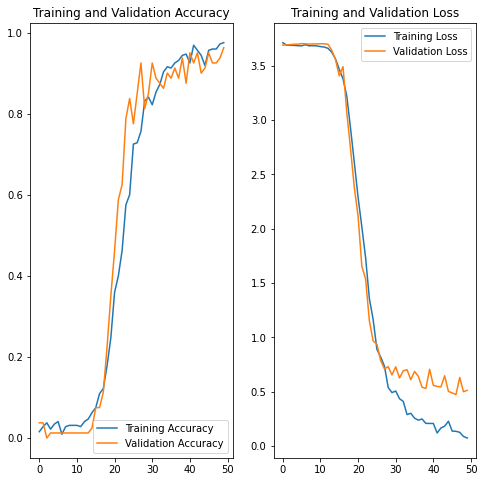

In [23]:
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']

loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
#Model5 gave very good results and reduced overfitting 
# Changing the optimizer
num_classes = 40
model6 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
#from keras.optimizers import SGD
from keras.optimizers import gradient_descent_v2
opt = gradient_descent_v2.SGD(lr=0.01, momentum=0.9)
model6.compile(optimizer= opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=50
history6 = model6.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs, verbose = 1
)
mod6 = model6.evaluate(val_ds)
mod6[1]


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


10/10 [==============================] - 2s 119ms/step - loss: 3.6911 - accuracy: 0.0219 - val_loss: 3.6880 - val_accuracy: 0.0250
Epoch 2/50
10/10 [==============================] - 1s 103ms/step - loss: 3.6914 - accuracy: 0.0188 - val_loss: 3.6900 - val_accuracy: 0.0250
Epoch 3/50
10/10 [==============================] - 1s 101ms/step - loss: 3.6887 - accuracy: 0.0281 - val_loss: 3.6912 - val_accuracy: 0.0250
Epoch 4/50
10/10 [==============================] - 1s 104ms/step - loss: 3.6890 - accuracy: 0.0219 - val_loss: 3.6944 - val_accuracy: 0.0250
Epoch 5/50
10/10 [==============================] - 1s 104ms/step - loss: 3.6876 - accuracy: 0.0375 - val_loss: 3.6958 - val_accuracy: 0.0250
Epoch 6/50
10/10 [==============================] - 1s 104ms/step - loss: 3.6859 - accuracy: 0.0344 - val_loss: 3.6971 - val_accuracy: 0.0250
Epoch 7/50
10/10 [==============================] - 1s 104ms/step - loss: 3.6881 - accuracy: 0.0375 - val_loss: 3.6997 - val_accuracy: 0.0375
Epoch 8/50
10/10 

0.7124999761581421

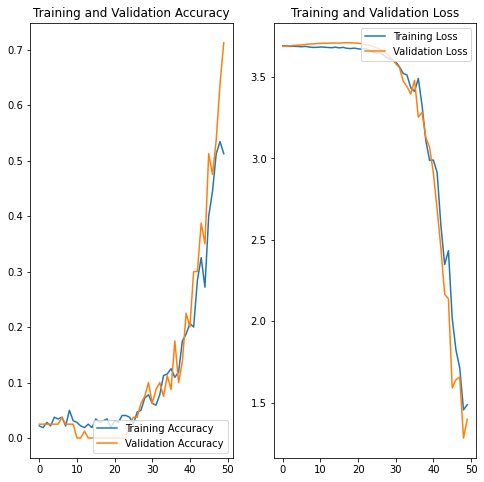

In [25]:
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']

loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
#Model6 gave a very less accuracy with sgd optimizer
# Decreasing the dropout to 20%
num_classes = 40
model7 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation="relu"),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model7.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=50
history7 = model7.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs, verbose = 1
)
mod7 = model7.evaluate(val_ds)
mod7[1]

Epoch 1/50
10/10 [==============================] - 2s 120ms/step - loss: 3.7168 - accuracy: 0.0375 - val_loss: 3.6885 - val_accuracy: 0.0375
Epoch 2/50
10/10 [==============================] - 1s 104ms/step - loss: 3.6900 - accuracy: 0.0344 - val_loss: 3.6928 - val_accuracy: 0.0250
Epoch 3/50
10/10 [==============================] - 1s 103ms/step - loss: 3.6885 - accuracy: 0.0219 - val_loss: 3.6928 - val_accuracy: 0.0125
Epoch 4/50
10/10 [==============================] - 1s 102ms/step - loss: 3.6872 - accuracy: 0.0312 - val_loss: 3.6940 - val_accuracy: 0.0000e+00
Epoch 5/50
10/10 [==============================] - 1s 102ms/step - loss: 3.6876 - accuracy: 0.0344 - val_loss: 3.6954 - val_accuracy: 0.0000e+00
Epoch 6/50
10/10 [==============================] - 1s 104ms/step - loss: 3.6872 - accuracy: 0.0375 - val_loss: 3.7009 - val_accuracy: 0.0000e+00
Epoch 7/50
10/10 [==============================] - 1s 103ms/step - loss: 3.6893 - accuracy: 0.0437 - val_loss: 3.6960 - val_accuracy: 0

0.8999999761581421

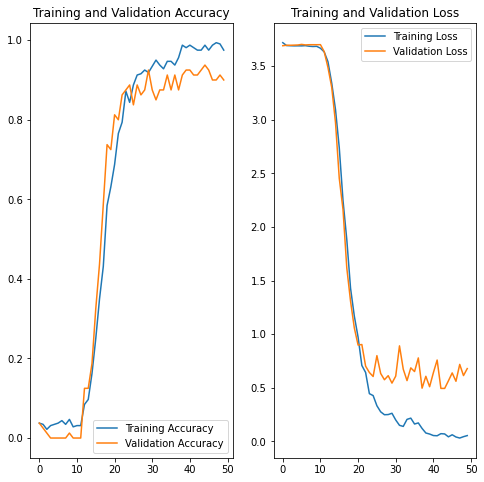

In [27]:
acc = history7.history['accuracy']
val_acc = history7.history['val_accuracy']

loss = history7.history['loss']
val_loss = history7.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

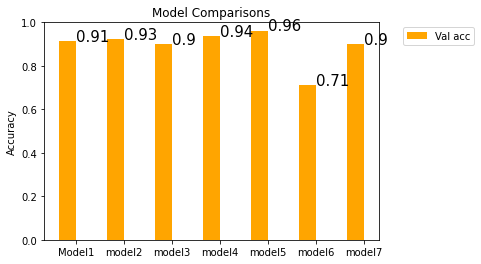

In [28]:
# Summarize the findings for all models
labels = ['Model1', 'model2','model3', 'model4', 'model5','model6','model7']
training_scores = [mod1[1],mod2[1],mod3[1], mod4[1], mod5[1], mod6[1],mod7[1]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Val acc', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')
for index,data in enumerate(training_scores):
    plt.text(x=index , y =data , s=round(data,2) , fontdict=dict(fontsize=15))
plt.title('Model Comparisons')
plt.show()

In [29]:
# of all models model5 did very well 
# importing th confusion matrix
from sklearn.metrics import confusion_matrix
#predicting the values on test data
y_pred = model5.predict(val_ds)
#predicting the final category
predicted_categories = tf.argmax(y_pred, axis=1)
# original classes
true_categories = tf.concat([y for x, y in val_ds], axis=0)
# building confusion matrix
cm = confusion_matrix(predicted_categories, true_categories)

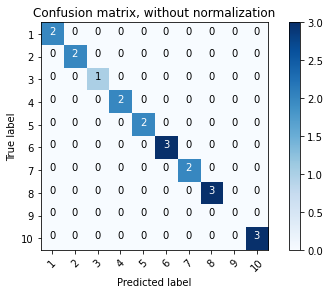

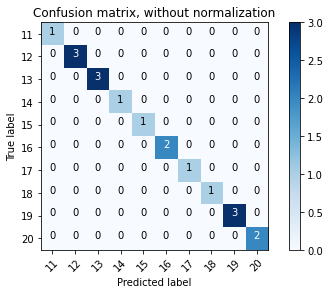

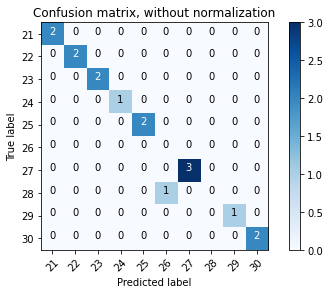

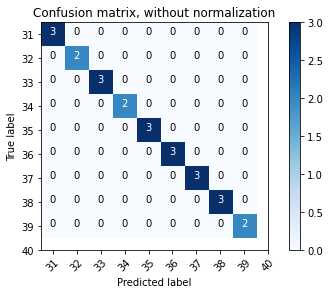

In [30]:
import itertools
from sklearn.metrics import classification_report
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plt.figure()
plot_confusion_matrix(cm[0:10,0:10], classes=[1,2,3,4,5,6,7,8,9,10],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cm[10:20,10:20], classes=[11,12,13,14,15,16,17,18,19,20],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cm[20:30,20:30], classes=[21,22,23,24,25,26,27,28,29,30],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cm[30:40,30:40], classes=[31,32,33,34,35,36,37,38,39,40],
                      title='Confusion matrix, without normalization')


In [31]:
print("Confusion matrix:\n%s" % confusion_matrix(np.array(true_categories), predicted_categories))
print(classification_report(np.array(true_categories), predicted_categories))

Confusion matrix:
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

**SUMMARY**

Overall model5 with 4 convultion/maxpooling layers followed by dropout, flatten , 2 hidden layers followed by dropout, output layer worked well with 0.93 accuracy.

I have started by importing the zipfile from github using wget and then unzipping to content folder but the files are corrupted and not able to access from the second run.I have then placed the facesDB data in my google drive and linked it to my mount drive in the google colab. I have then unzipped the data to content folder in colab.

I have pulled the data to training and validation data using the image dataset from the directory function. Printed the different classes and also displayed few images

cached the images using the cache function for fast access of the data.It keeps the images in memory after they're loaded off disk during the first epoch

As the RGB values are in [0,255] range I have standardized using rescaling

Model1

model1 is built with 3 convultion/maxpooling layers followed by flatten, one hidden layer and one output layer. This has give accuracy of 93% but the plot of accuracy shows that the model is overfitting.

Model2

model2 is built with 4 convultion/maxpooling layers followed by flatten, one hidden layer and one output layer. This has give accuracy of 90% but the plot of accuracy shows that the model is still overfitting. Adding a convultion layer didn't help.

Model3

model3 is built with 4 convultion/maxpooling layers followed by dropout,flatten, one hidden layer and one output layer. This has give accuracy of 90% but the plot of accuracy shows this model has reduced the overfitting.Dropout layers helps to drop units based on dropout value. Thus the overfitting has reduced.

Model4

model4 is built with 4 convultion/maxpooling layers followed by dropout,flatten, one hidden layer and one output layer. This has more filters to convultion layers compared to earlier models. This model still overfits with a accuracy of 90%

Model5

model5 is built with 4 convultion/maxpooling layers followed by dropout,flatten, hidden layer , dropout, hidden layer and output layer. This has given an accuracy of 93% . The overfitting has also reduced. Dropout has helped a lot in reducing the overfitting.

In model6 I have tried model5 using SGD optimizer but the accuracy was only 50%.

In model7 I have tried model5 using reduced dropout percentage, this has gave accuracy of 0.91 but this has still some overfitting.

I have done the bar chart of accuracies in all the models I have ran.

As model5 is working well among all the models. I have done the confusion matrix for model 5 and plotted the heat map.

Conclusion This is one of the toughest project I have worked. The goal of the project is to build face recognition model using the CNN and find the best model by tunning different layers. I have ran 7 different models using different convultionlayers, hidden layers, droupout layers, optimizers.Key observation was that dropout layer has helped a lot in reducing the overfitting.